<a href="https://colab.research.google.com/github/erendagasan/keras-rock-paper-scissors-img-classification/blob/main/rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Get information from data

In [ ]:
builder = tfds.builder("rock_paper_scissors")
builder.info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

Load Datasets

In [ ]:
train_ds = tfds.load(name = "rock_paper_scissors", split="train")
test_ds = tfds.load(name = "rock_paper_scissors", split="test")

Get info about Datasets

In [ ]:
fig = tfds.show_examples(info, train_ds)
fig

AttributeError: ignored

Convert tensor obj to a numpy array

In [ ]:
train_images = np.array([example["image"].numpy()[:,:,0] for example in train_ds])
train_labels = np.array([example["label"].numpy() for example in train_ds])

test_images = np.array([example["image"].numpy()[:,:,0] for example in test_ds])
test_labels = np.array([example["label"].numpy() for example in test_ds])

In [ ]:
train_images = train_images.reshape(2520,300,300,1)
test_images = test_images.reshape(372,300,300,1)

In [ ]:
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

train_images /= 255
test_images /= 255

Create NN

In [ ]:
model = keras.Sequential(
    [
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(512, activation = "relu"),
    keras.layers.Dense(3, activation = "softmax")     
    ])

model.compile(optimizer="adam",
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ["accuracy"])

model.fit(train_images, train_labels, batch_size=32, epochs=10)

Epoch 1/10
79/79 [==============================] - 20s 235ms/step - loss: 21.8985 - accuracy: 0.3905
Epoch 2/10
79/79 [==============================] - 19s 235ms/step - loss: 1.1244 - accuracy: 0.6484
Epoch 3/10
79/79 [==============================] - 19s 236ms/step - loss: 0.5928 - accuracy: 0.7532
Epoch 4/10
79/79 [==============================] - 19s 237ms/step - loss: 0.3751 - accuracy: 0.8690
Epoch 5/10
79/79 [==============================] - 19s 236ms/step - loss: 0.3880 - accuracy: 0.8516
Epoch 6/10
79/79 [==============================] - 19s 235ms/step - loss: 0.5501 - accuracy: 0.7774
Epoch 7/10
79/79 [==============================] - 18s 232ms/step - loss: 0.6244 - accuracy: 0.7921
Epoch 8/10
79/79 [==============================] - 19s 236ms/step - loss: 0.2373 - accuracy: 0.9127
Epoch 9/10
79/79 [==============================] - 19s 236ms/step - loss: 0.5622 - accuracy: 0.7929
Epoch 10/10
79/79 [==============================] - 19s 237ms/step - loss: 0.2470 - accur

In [ ]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 75ms/step - loss: 2.3223 - accuracy: 0.5806


[2.32230544090271, 0.5806451439857483]

Fully Connected NN approach didn't gave us the wanted accuracy

Train a Network with CNN

In [ ]:
model = keras.Sequential(
    [
keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(300, 300, 1)),
keras.layers.Conv2D(32, (3, 3), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(3, activation='softmax')
]
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, batch_size=32, epochs=10)

In [ ]:
model.evaluate(test_images, test_labels)

We couldn't get the accuracy we want because of overfitting. 

Try a better connected NN

In [ ]:
model = keras.Sequential(
    [
  keras.layers.AveragePooling2D(6, 3, input_shape=(300, 300, 1)),
  keras.layers.Conv2D(32, (3, 3), activation='relu'),
  keras.layers.MaxPool2D(2,2),
  keras.layers.Conv2D(64, (3, 3), activation='relu'),
  keras.layers.MaxPool2D(2,2),
  keras.layers.Dropout(0.5),
  keras.layers.Conv2D(64, (3, 3), activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(3, activation='softmax')
]
)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, batch_size=32, epochs=10)

Epoch 1/10
79/79 [==============================] - 10s 18ms/step - loss: 0.7097 - accuracy: 0.6583
Epoch 2/10
79/79 [==============================] - 1s 16ms/step - loss: 0.1291 - accuracy: 0.9627
Epoch 3/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0489 - accuracy: 0.9845
Epoch 4/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0128 - accuracy: 0.9972
Epoch 5/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0089 - accuracy: 0.9972
Epoch 6/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0038 - accuracy: 0.9992
Epoch 7/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 8/10
79/79 [==============================] - 1s 16ms/step - loss: 6.5256e-04 - accuracy: 1.0000
Epoch 9/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0033 - accuracy: 0.9984
Epoch 10/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0040 - accuracy: 0.9992


In [ ]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 20ms/step - loss: 1.1402 - accuracy: 0.7419


[1.14020574092865, 0.7419354915618896]

Plot

In [ ]:
np.round(model.predict(np.array([test_images[20]])))

array([[0., 1., 0.]], dtype=float32)

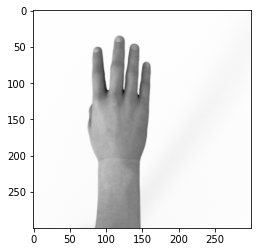

In [ ]:
image = test_images[20].reshape(300,300)

plt.imshow(image, cmap="Greys_r")

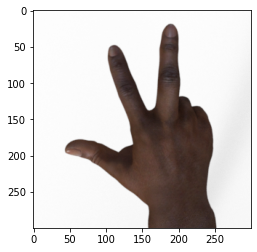

In [ ]:
rgb_images = np.array([example["image"].numpy() for example in train_ds.take(1)])
rgb_image = rgb_images[0]

plt.imshow(rgb_image)

Convert PNG/JPG images to Numpy Format

In [ ]:
import imageio

im = imageio.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/Rock-paper-scissors_%28paper%29.png/1200px-Rock-paper-scissors_%28paper%29.png")

im_np = np.asarray([im])
im_np.shape

(1, 1200, 1200, 4)